# Fuzzy

## Install library

In [ ]:
# You need to install the fuzzy logic Python package: scikit-fuzzy
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import library

In [ ]:
import pandas as pd 
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 


## Process

In [ ]:
# Universe statement of antecedents and consequents
sensor= ctrl.Antecedent(np.arange(0, 30001, 1), 'Sensor') # Antecedents are inputs: light sensor average
hora= ctrl.Antecedent(np.arange(0, 24, 1), 'Hora') #Antecedents are inputs: time of measurement
enclamp= ctrl.Consequent(np.arange(0, 101, 1), 'Porcentaje ciclo iluminación') # Consequent are outputs: percentage of operation for the next cycle

# Sensor membership functions
sensor['Muy Bajo'] = fuzz.trapmf(sensor.universe, [0,0,5500,6000]) 
sensor['Bajo'] = fuzz.trapmf(sensor.universe, [5500, 6000, 10000, 10500])
sensor['Medio'] = fuzz.trapmf(sensor.universe, [10000, 10500, 20000, 20500])
sensor['Aceptable'] = fuzz.trapmf(sensor.universe, [20000, 20500, 25000, 25500])
sensor['Ideal'] = fuzz.trapmf(sensor.universe, [25000, 25500, 30000, 30000])

# Membership functions Time
hora['Madrugada'] = fuzz.trapmf(hora.universe, [0,0,4,5]) 
hora['Mañana'] = fuzz.trapmf(hora.universe, [4,5,9,10]) 
hora['Medio dia'] = fuzz.trapmf(hora.universe, [9,10,14,15]) 
hora['Tarde'] = fuzz.trapmf(hora.universe, [14,15,19,20]) 
hora['Noche'] = fuzz.trapmf(hora.universe, [19,20,23,23]) 

# Membership functions % Luminosity
enclamp['Nulo'] = fuzz.trimf(enclamp.universe, [0,0,1]) 
enclamp['Bajo'] = fuzz.trapmf(enclamp.universe, [0,1,25,35]) 
enclamp['Medio'] = fuzz.trapmf(enclamp.universe, [25,35,55,65]) 
enclamp['Alto'] = fuzz.trapmf(enclamp.universe, [55,65,80,85]) 
enclamp['Muy Alto'] = fuzz.trapmf(enclamp.universe, [80,85,100,100]) 

#Establishment of rules
rule1 = ctrl.Rule((hora['Madrugada'] | hora['Noche']) & (sensor['Muy Bajo'] | sensor['Bajo'] | sensor['Medio'] | sensor['Aceptable'] | sensor['Ideal']), enclamp['Nulo']) #Guarantee hours of darkness
rule2 = ctrl.Rule(sensor['Ideal'], enclamp['Nulo']) #Regardless of the time (except early morning and night), when it is already ideal, light is not supplied
rule3 = ctrl.Rule(sensor['Muy Bajo'] & (~(hora['Madrugada'] | hora['Noche'])), enclamp['Muy Alto']) #Regardless of the time (except early morning and night), when it is very low, very high luminosity is supplied
rule4 = ctrl.Rule(sensor['Bajo'] & (~(hora['Madrugada'] | hora['Noche'])), enclamp['Alto']) #Regardless of the time (except early morning and night), when it is low, high luminosity is supplied
rule5 = ctrl.Rule(hora['Medio dia'] & sensor['Aceptable'], enclamp['Nulo']) #At noon if it is in acceptable light is not supplied
rule6 = ctrl.Rule(sensor['Medio'] & (~(hora['Madrugada'] | hora['Noche'])), enclamp['Medio']) #Regardless of the time (except early morning and night), when it is medium, medium luminosity is supplied
rule7 = ctrl.Rule((hora['Mañana'] | hora['Tarde']) & sensor['Aceptable'], enclamp['Bajo']) #In the morning and in the afternoon when it is acceptable, low light is supplied

luminosidad_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
luminosidad = ctrl.ControlSystemSimulation(luminosidad_ctrl)


## Graphics

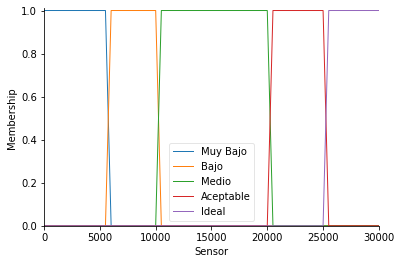

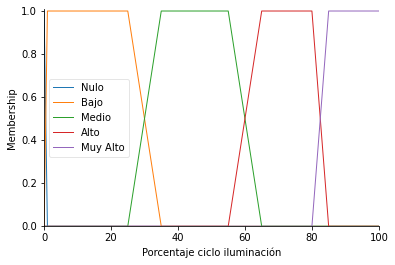

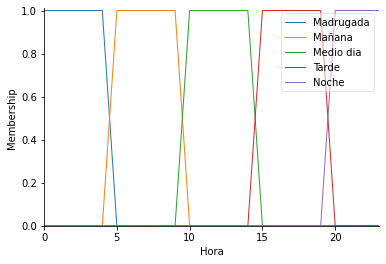

In [ ]:
# .view() To visualize
sensor.view()
enclamp.view()
hora.view()

In [ ]:
#Creation of the function to obtain the necessary % luminosity
def pc_lum (l_sensada,hora):
  l_sen_ampli = l_sensada*30
  # Input for Control System
  luminosidad.input['Sensor'] = l_sen_ampli
  luminosidad.input['Hora'] = hora
  # Implementation of Fuzzy control
  luminosidad.compute()
  salida= luminosidad.output['Porcentaje ciclo iluminación']
  return salida